In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset 
cleaned_data = pd.read_csv("../Data/cleaned_ecommerce_data.csv")

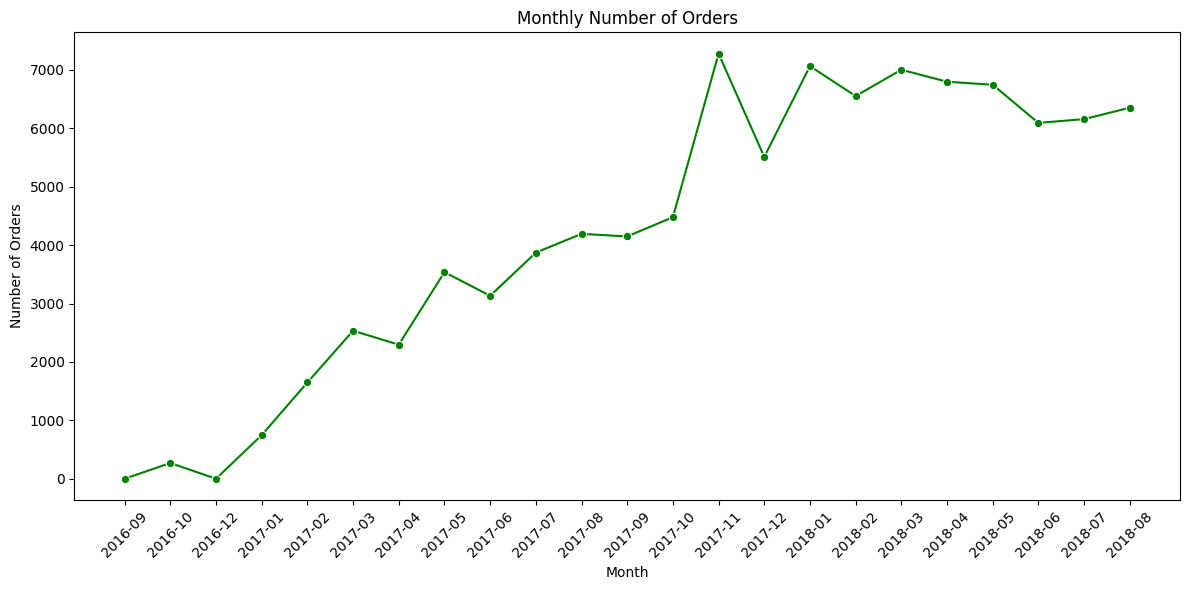

In [3]:
# Monthly Order Trend 
cleaned_data['order_purchase_timestamp'] = pd.to_datetime(cleaned_data['order_purchase_timestamp'])
cleaned_data['order_month'] = cleaned_data['order_purchase_timestamp'].dt.to_period('M').astype(str)
monthly_orders = cleaned_data.groupby('order_month')['order_id'].nunique().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_orders, x='order_month', y='order_id', marker='o', color='green')
plt.title('Monthly Number of Orders')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
monthly_orders.to_csv('../Data/monthly_order_trend.csv', index=False)


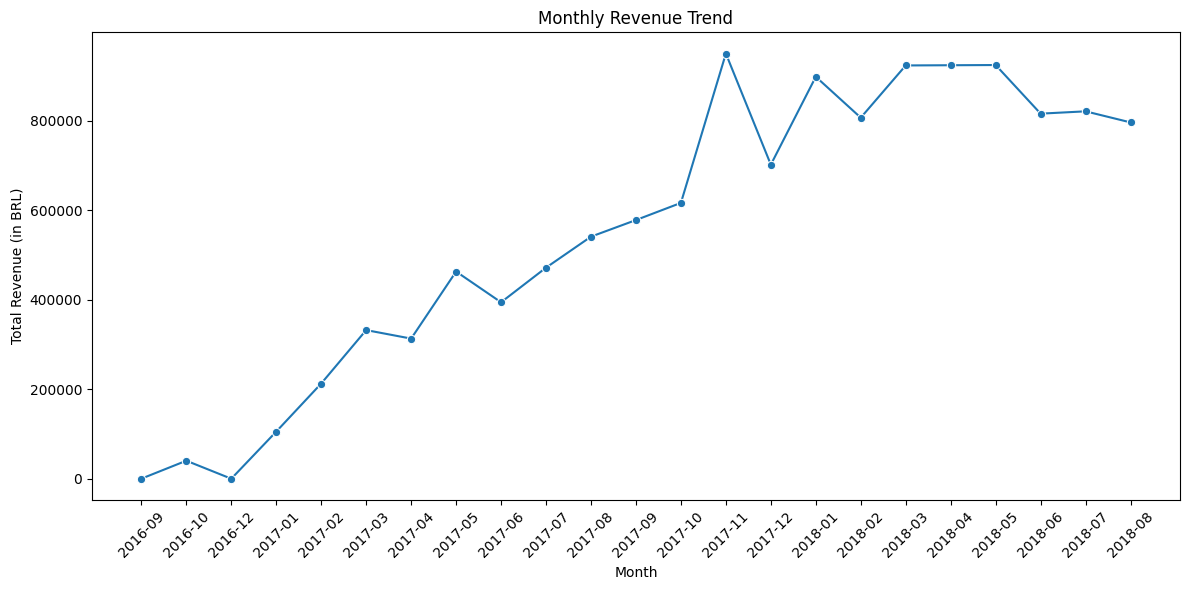

In [4]:
#Monthly Revenue Trend
cleaned_data['order_purchase_timestamp'] = pd.to_datetime(cleaned_data['order_purchase_timestamp'])
cleaned_data['order_month'] = cleaned_data['order_purchase_timestamp'].dt.to_period('M')
monthly_revenue = cleaned_data.groupby('order_month')['price'].sum().reset_index()
monthly_revenue['order_month'] = monthly_revenue['order_month'].astype(str)  # Convert Period to string
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_revenue, x='order_month', y='price', marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (in BRL)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
monthly_revenue.to_csv('../Data/monthly_revenue_trend.csv', index=False)


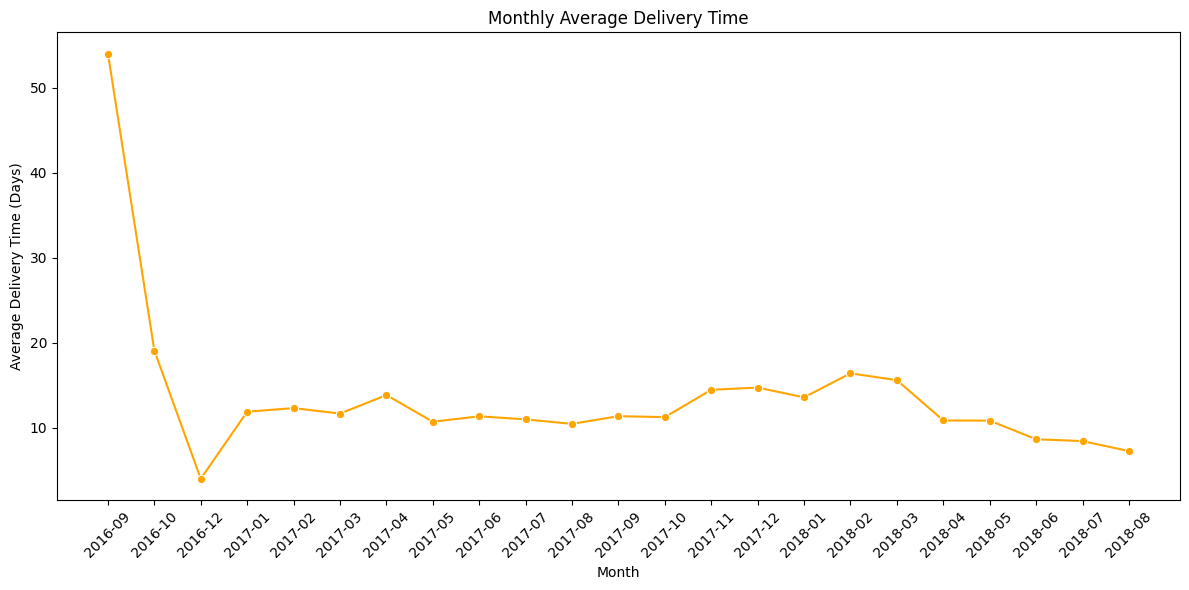

In [5]:
#Monthly delivery tiem trend
cleaned_data['order_delivered_customer_date'] = pd.to_datetime(cleaned_data['order_delivered_customer_date'])
cleaned_data['order_purchase_timestamp'] = pd.to_datetime(cleaned_data['order_purchase_timestamp'])
cleaned_data['delivery_time'] = (cleaned_data['order_delivered_customer_date'] - cleaned_data['order_purchase_timestamp']).dt.days
cleaned_data['order_month'] = cleaned_data['order_purchase_timestamp'].dt.to_period('M').astype(str)
monthly_delivery = cleaned_data.groupby('order_month')['delivery_time'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_delivery, x='order_month', y='delivery_time', marker='o', color='orange')
plt.title('Monthly Average Delivery Time')
plt.xlabel('Month')
plt.ylabel('Average Delivery Time (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
monthly_delivery.to_csv('../Data/monthly_delivery_time_trend.csv', index=False)
